<a href="https://colab.research.google.com/github/andrscyv/datalab_delitos/blob/master/DataLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [97]:
!pip install gmplot

     |████████████████████████████████| 122kB 3.4MB/s 
  Created wheel for gmplot: filename=gmplot-1.2.0-cp36-none-any.whl size=143765 sha256=edd758cb6e8032c9f234028b5ecfb05cee9fdbbaea914f22d7e4ce5865966d58
  Stored in directory: /root/.cache/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot


In [0]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import gmplot

In [62]:
data=pd.read_csv('/content/drive/My Drive/dataLab/datalab.csv')
data.head()

,Unnamed: 0,FechaInicio,Delito,Categoria,Sexo,Edad,CalidadJuridica,FechaHecho,HoraHecho,HoraInicio,geopoint,AlcaldiaHechos,ColoniaHechos,persona_fisica
0,1,20/12/2019,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,Masculino,NaN,VICTIMA Y DENUNCIANTE,19/12/2019,16:00:00,03:26:00,"19.367423897,-99.2002892",ALVARO OBREGON,LOMAS DE PLATEROS,True
1,2,20/12/2019,LESIONES INTENCIONALES POR GOLPES,DELITO DE BAJO IMPACTO,Masculino,NaN,VICTIMA Y DENUNCIANTE,19/12/2019,17:00:00,03:50:00,"19.132673472,-99.1848566757",TLALPAN,PARRES EL GUARDA,True
2,3,20/12/2019,DESAPARICION FORZADA DE PERSONAS,DELITO DE BAJO IMPACTO,Masculino,36.0,VICTIMA,19/12/2019,12:30:00,04:12:00,"19.3800069441,-99.2121711759",ALVARO OBREGON,GOLONDRINAS 1A SECCIÓN,True
3,4,20/12/2019,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,Femenino,NaN,VICTIMA Y DENUNCIANTE,01/12/2019,01:00:00,04:39:00,"19.4403246412,-99.0972838597",VENUSTIANO CARRANZA,ROMERO RUBIO,True
4,5,20/12/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,24.0,VICTIMA Y DENUNCIANTE,20/12/2019,00:00:00,05:03:00,"19.3738296017,-99.279684614",CUAJIMALPA DE MORELOS,LA NAVIDAD,True


Primero exploramos los tipos de variables del dataset y estadisticas descriptivas

In [63]:
data.info()
## Veamos cuales columnas tienen valorse nulos
print("\nPorcentaje de valores nulos por columna\n")
data.isnull().sum()/data.shape[0]*100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200789 entries, 0 to 200788
Data columns (total 14 columns):
Unnamed: 0         200789 non-null int64
FechaInicio        200789 non-null object
Delito             200789 non-null object
Categoria          200789 non-null object
Sexo               179300 non-null object
Edad               147391 non-null float64
CalidadJuridica    200789 non-null object
FechaHecho         200764 non-null object
HoraHecho          185950 non-null object
HoraInicio         200203 non-null object
geopoint           192470 non-null object
AlcaldiaHechos     200789 non-null object
ColoniaHechos      192451 non-null object
persona_fisica     200789 non-null bool
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 20.1+ MB

Porcentaje de valores nulos por columna



Unnamed: 0          0.000000
FechaInicio         0.000000
Delito              0.000000
Categoria           0.000000
Sexo               10.702280
Edad               26.594086
CalidadJuridica     0.000000
FechaHecho          0.012451
HoraHecho           7.390345
HoraInicio          0.291849
geopoint            4.143155
AlcaldiaHechos      0.000000
ColoniaHechos       4.152618
persona_fisica      0.000000
dtype: float64

Notamos que las variables Sexo, Edad, FechaHecho, HoraHecho, HoraInicio, geopoint, AlcaldiaHechos, ColoniaHechos y persona_fisica tienen valores nulos.

Además, las variables que representan horas o fechas tienen tipo 'object', transformalas a datetime sería util para manejarlas con mayor facilidad. Ocurre lo mismo con la variable geopoint.

In [64]:
## Calculemos estadisticas descriptivas de las columnas
data.describe(include = 'all')

,Unnamed: 0,FechaInicio,Delito,Categoria,Sexo,Edad,CalidadJuridica,FechaHecho,HoraHecho,HoraInicio,geopoint,AlcaldiaHechos,ColoniaHechos,persona_fisica
count,200789.000000,200789,200789,200789,179300,147391.000000,200789,200764,185950,200203,192470,200789,192451,200789
unique,NaN,365,254,16,3,NaN,4,2119,1437,25240,163054,277,1595,2
top,NaN,11/09/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Masculino,NaN,VICTIMA Y DENUNCIANTE,01/04/2019,12:00:00,13:09:00,"19.4212108958,-99.1495658",IZTAPALAPA,CENTRO,True
freq,NaN,849,26936,148815,99574,NaN,150986,735,11662,256,84,32591,5767,178843
mean,100395.000000,NaN,NaN,NaN,NaN,38.474554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,57962.935938,NaN,NaN,NaN,NaN,16.306435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50198.000000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,100395.000000,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,150592.000000,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De la tabla anterior notamos que existen 254 distintos delitos y 16 categorias de estos en el dataset,estas variables destacan para ser investigadas más a fondo pues nos ayudarán a entender mejor sobre qué delitos tenemos información.

Posteriormente, se podría investigar sobre en qué momentos del día se tiene mayor incidencia de delitos y en qué zonas de la ciudad y contrastar con nuestra percepción de riesgos en la ciudad.


# Preprocesamiento


In [65]:
data=pd.read_csv('/content/drive/My Drive/dataLab/datalab.csv')
def string_to_time(df, col):
  df[col] = pd.to_datetime(df[col],format= '%H:%M:%S').dt.time

def string_to_date(df,col):
  df[col] = pd.to_datetime(df[col],errors='coerce',format="%d/%m/%Y")

''' Convertimos las fechas a datetime, las horas a datetime.time y geopoint a lista de floats '''
string_to_date(data,'FechaInicio')
string_to_date(data,'FechaHecho')
string_to_time(data,'HoraHecho')
string_to_time(data,'HoraInicio')
data['geopoint'] = data['geopoint'].apply( lambda x : [float(c) for c in x.split(',')] if isinstance(x,str) else [])

#Verificamos los cambios de tipo en las columnas
print(data.iloc[0].apply(type))
print('Tipo de geopoint es lista con elementos tipo: ',type(data.geopoint.iloc[0][0]))

Unnamed: 0                                     <class 'numpy.int64'>
FechaInicio        <class 'pandas._libs.tslibs.timestamps.Timesta...
Delito                                                 <class 'str'>
Categoria                                              <class 'str'>
Sexo                                                   <class 'str'>
Edad                                         <class 'numpy.float64'>
CalidadJuridica                                        <class 'str'>
FechaHecho         <class 'pandas._libs.tslibs.timestamps.Timesta...
HoraHecho                                    <class 'datetime.time'>
HoraInicio                                   <class 'datetime.time'>
geopoint                                              <class 'list'>
AlcaldiaHechos                                         <class 'str'>
ColoniaHechos                                          <class 'str'>
persona_fisica                                 <class 'numpy.bool_'>
Name: 0, dtype: object
Tipo de geo

# Pregunta 1: ¿Cuáles categorias/delitos son los mayoritarios en el dataset?


Valores de variablae 'Categoria' con frecuencia porcentual


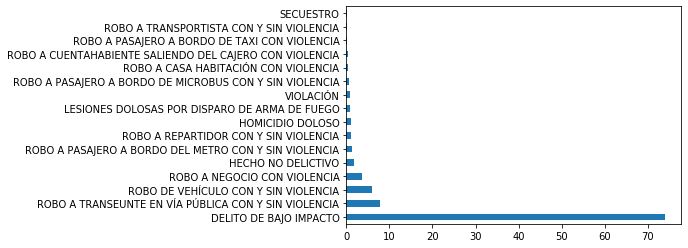

In [66]:
print(f"Valores de variablae 'Categoria' con frecuencia porcentual")
categorias = data["Categoria"].value_counts()/data.shape[0]*100
categorias.plot(kind='barh', y='Categoria', x = 'Porcentaje del total')

Notamos que la categoría más frecuenta es DELITO DE BAJO IMPACTO lo que lleva a preguntarnos ¿Cuáles son estos delitos?

En segundo lugar se encuentra ROBO A TRANSEUNTE EN VÍA PUBLICA CON Y SIN VIOLENCIA. En nuestra perspectiva personal, el problema de los asaltos en via pública son una preocupación importante de todos los que somo transeuntes. Podria ser interesante indagar más sobre las horas y zonas en donde acontecen el mayor numero de estos incidentes. Podría agruparse esta categoria con ROBO A PASAJERO A BORDO DEL METRO/MICROBUS CON Y SIN VIOLENCIA para seguir el análisis.


# Delitos de bajo impacto

In [67]:
bajo_impacto = data[data['Categoria'] == "DELITO DE BAJO IMPACTO"]["Delito"]
print('Primeros 25 delitos de mayor frecuencia en categoria de BAJO IMPACTO (Porcentaje del total)')
(bajo_impacto.value_counts().head(25)/data.shape[0]*100).to_frame()

Primeros 25 delitos de mayor frecuencia en categoria de BAJO IMPACTO (Porcentaje del total)


,Delito
VIOLENCIA FAMILIAR,13.415078
AMENAZAS,5.337444
FRAUDE,4.827456
ROBO DE OBJETOS,3.223284
ROBO A NEGOCIO SIN VIOLENCIA,2.994188
ROBO DE ACCESORIOS DE AUTO,2.809915
NARCOMENUDEO POSESION SIMPLE,2.603728
ROBO A CASA HABITACION SIN VIOLENCIA,2.366165
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,2.191853
ABUSO SEXUAL,2.146034


Como veremos a continuación , el delito de VIOLENCIA FAMILIAR no solo es el mas frecuente de los delitos de alto impacto, sino de todos los delitos en el dataset

In [68]:
corte = 25
delitos = data["Delito"].value_counts().head(corte)/data.shape[0]*100
print(f"{corte} valores más frecuentes de delitos en porcentaje\n")
delitos.to_frame()


25 valores más frecuentes de delitos en porcentaje



,Delito
VIOLENCIA FAMILIAR,13.415078
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,7.051681
AMENAZAS,5.337444
FRAUDE,4.827456
ROBO A NEGOCIO CON VIOLENCIA,3.620716
ROBO DE OBJETOS,3.223284
ROBO A NEGOCIO SIN VIOLENCIA,2.994188
ROBO DE ACCESORIOS DE AUTO,2.809915
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,2.789993
NARCOMENUDEO POSESION SIMPLE,2.603728


# Pregunta 2 : ¿En qué horarios y zonas ocurre la mayor cantidad de delitos contra transeuntes con y sin violencia ?


Ahora que tenemos una mejor idea de los delitos incluidos en el dataset, nos enfocaremos en analizar aquellos delitos que podriamos llamar "asaltos" en general. Agruparemos las categorias  de : ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA, ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA y ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA

Dentro de este subconjunto hay 19674 observaciones
Cantidad de observaciones por categoria

ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA       15876
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA       2577
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA     1221
Name: Categoria, dtype: int64

Porcentaje de valores nulos por columna para este subconjunto

Unnamed: 0          0.000000
FechaInicio         0.000000
Delito              0.000000
Categoria           0.000000
Sexo                5.067602
Edad               18.608316
CalidadJuridica     0.000000
FechaHecho          0.045746
HoraHecho           3.578327
HoraInicio          0.223645
geopoint            0.000000
AlcaldiaHechos      0.000000
ColoniaHechos       1.407950
persona_fisica      0.000000
dtype: float64

 Porcentade de colonias del total de asaltos


" colonias_mas_seguras = asaltos.ColoniaHechos.value_counts().tail(corte)/num_asaltos*100\ncolonias_mas_seguras.sort_values()\ncolonias_mas_seguras.plot(kind='barh', figsize = (6,10)) "

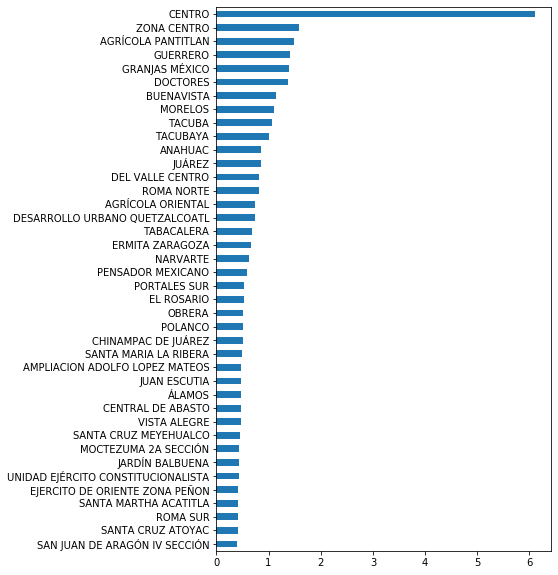

In [110]:
#Nos enfocaremos en un subconjunto del dataset original

corte = 40
print(f'Dentro de este subconjunto hay {num_asaltos} observaciones')
asaltos = data[ data['Categoria'].isin(['ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA']) ]
num_asaltos = asaltos.shape[0]
print('Cantidad de observaciones por categoria\n')
print(asaltos.Categoria.value_counts())
print("\nPorcentaje de valores nulos por columna para este subconjunto\n")
print(asaltos.isnull().sum()/asaltos.shape[0]*100)
print('\n Porcentade de colonias del total de asaltos (mayores incidentes)')
colonias_mas_inseguras = asaltos.ColoniaHechos.value_counts()/num_asaltos*100
colonias_mas_inseguras = colonias_mas_inseguras.sort_values().tail(corte)
colonias_mas_inseguras.plot(kind='barh', figsize = (6,10))


Porcentaje incidentes por colonia (menor numero de incidentes)


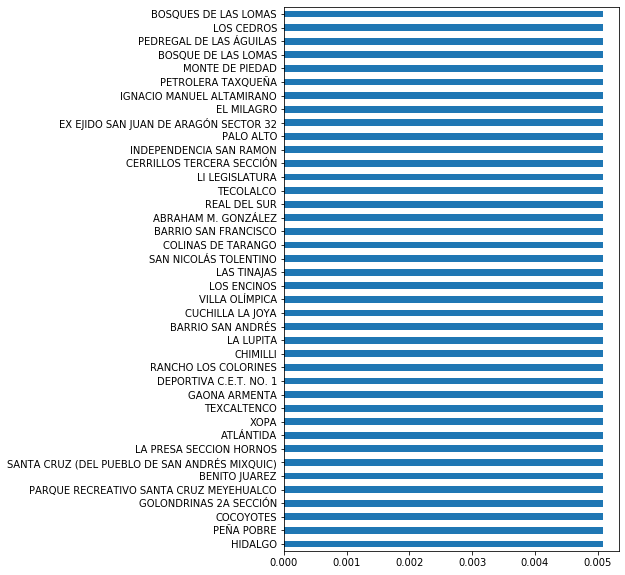

In [112]:
print('Porcentaje incidentes por colonia (menor numero de incidentes)')
colonias_mas_seguras = asaltos.ColoniaHechos.value_counts()/num_asaltos*100
colonias_mas_seguras = colonias_mas_seguras.sort_values().head(corte)
colonias_mas_seguras.plot(kind='barh', figsize = (6,10))

Ahora graficaremos frecuencia de incidentes por hora del día

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


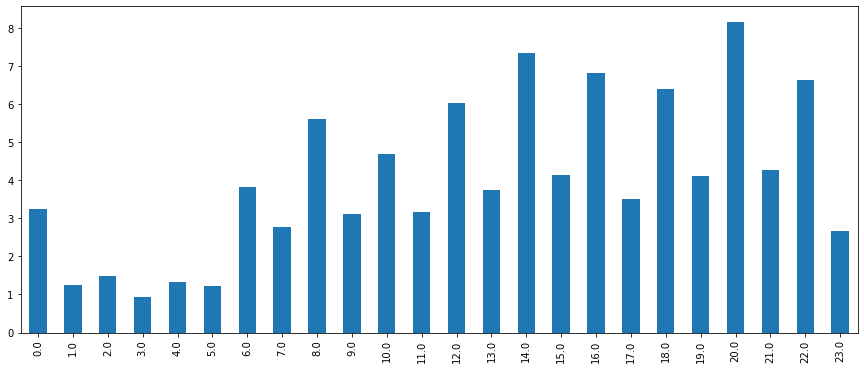

In [91]:
#Rendodeamos las horas
asaltos['HoraHechoRedondeado']= pd.to_datetime(asaltos.HoraHecho,format= '%H:%M:%S').dt.round('H').dt.hour
#Calculamos porcentaje de incidencia por hora redondeada
frec_hora = asaltos_ord.HoraHechoRedondeado.value_counts()/num_asaltos*100
#Ordenamos por hora
frec_hora = frec_hora.sort_index()
frec_hora.plot(kind='bar', figsize = (15,6))


De la gráfica vemos que los incidentes ocurren basicamente a cualquier hora del dia exceptuando la madrugada (1 - 5 de la mañana ) y van en aumento hasta llegar a un máximo al rededor de las 20 hrs

# Conclusiones

De esta primera y sucinta exploracion de los datos encontramos que la mayor cantidad de delitos con carpeta de investigación caen en la categoría de delitos de bajo impacto y el delito con mayor frecuencia es (a nuestra sorpresa) violencia familiar. 

Dentro de los delitos que involucran robo a personas en la via publica o en transporte publico (con y sin violencia) encontramos que la colonia centro es la que reporta mayor porcentaje de incidentes (6%) y le siguen : Agricola Pantitlan, Guerrero , Granjas Mexico cada una con un poco más del 1% de los incidentes reportados. Las colonias con menor porcentaje de incidentes reportados son Bosques de las Lomas (0.005%) y le siguen : Los Cedros(0.005%), Pedregal de las Aguilas (0.005%), etc.

Además, de estos mismos casos, los delitos ocurren a lo largo de todo el dia. Se presentan aproximadamente 5% en la madrugada (de 1 - 5 am, el periodo con menos incidencias ) en contraste con aproximadamente el 30% que ocurre en la tarde y noche (18 - 22 hrs).

In [101]:
''' asaltos['LAT'] = asaltos.geopoint.apply(lambda x : x[0] if len(x) > 0 else 0 )
asaltos['LON'] = asaltos.geopoint.apply(lambda x : x[1] if len(x) > 0 else 0 )
# Creating the location we would like to initialize the focus on. 
# Store our latitude and longitude
latitudes = asaltos["LAT"]
longitudes = asaltos["LON"]

# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(19.4326, -99.1332, 10)

# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)
# Generate the heatmap into an HTML file
gmap.draw("/content/drive/My Drive/dataLab/heatmap.html") '''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
